In [1]:
import pandas as pd

log = pd.read_csv("datasets/git_log_refactoring.gz")
log.head()

,additions,deletions,file,timestamp
0,19,0,src/main/java/org/springframework/samples/petc...,2017-12-31 19:41:29
1,55,0,src/main/java/org/springframework/samples/petc...,2017-12-30 12:48:20
2,29,0,src/main/java/org/springframework/samples/petc...,2017-12-30 12:48:20
3,0,99,src/main/java/org/springframework/samples/petc...,2017-12-30 00:38:54
4,19,0,src/main/java/org/springframework/samples/petc...,2017-12-30 00:38:54


In [2]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31487 entries, 0 to 31486
Data columns (total 4 columns):
additions    31487 non-null int64
deletions    31487 non-null int64
file         31487 non-null object
timestamp    31487 non-null object
dtypes: int64(2), object(2)
memory usage: 984.0+ KB


In [3]:
log['timestamp'] = pd.to_datetime(log['timestamp'])
log = log.sort_values(by='timestamp').reset_index(drop=True)
log.head()

,additions,deletions,file,timestamp
0,250,0,src/main/java/org/springframework/samples/petc...,2013-05-15 03:35:33
1,0,90,src/main/java/org/springframework/samples/petc...,2013-05-15 17:36:46
2,93,0,src/main/java/org/springframework/samples/petc...,2013-05-15 17:36:46
3,39,0,src/main/java/org/springframework/samples/petc...,2013-05-15 17:36:46
4,0,139,src/main/java/org/springframework/samples/petc...,2013-05-15 17:36:46


In [4]:
log.loc[log['file'].str.contains("/jdbc/"), 'type'] = 'jdbc'
log.loc[log['file'].str.contains("/jpa/"), 'type'] = 'jpa'
log = log.dropna(subset=['type'])
log.head()

,additions,deletions,file,timestamp,type
0,250,0,src/main/java/org/springframework/samples/petc...,2013-05-15 03:35:33,jdbc
24,50,0,src/main/java/org/springframework/samples/petc...,2013-05-16 02:15:44,jdbc
55,78,0,src/main/java/org/springframework/samples/petc...,2013-05-17 15:12:26,jdbc
186,142,0,src/main/java/org/springframework/samples/petc...,2013-05-24 05:52:31,jdbc
243,123,0,src/main/java/org/springframework/samples/petc...,2013-05-28 08:15:35,jdbc


In [5]:
log['lines'] = log['additions'] - log['deletions']
log.head()

,additions,deletions,file,timestamp,type,lines
0,250,0,src/main/java/org/springframework/samples/petc...,2013-05-15 03:35:33,jdbc,250
24,50,0,src/main/java/org/springframework/samples/petc...,2013-05-16 02:15:44,jdbc,50
55,78,0,src/main/java/org/springframework/samples/petc...,2013-05-17 15:12:26,jdbc,78
186,142,0,src/main/java/org/springframework/samples/petc...,2013-05-24 05:52:31,jdbc,142
243,123,0,src/main/java/org/springframework/samples/petc...,2013-05-28 08:15:35,jdbc,123


In [6]:
log_timed = log.groupby(['timestamp', 'type']).lines.sum()
log_timed.head()

timestamp            type
2013-05-15 03:35:33  jdbc    250
2013-05-16 02:15:44  jdbc     50
2013-05-17 15:12:26  jdbc     78
2013-05-24 05:52:31  jdbc    142
2013-05-28 08:15:35  jdbc    123
Name: lines, dtype: int64

In [7]:
log_progess = log_timed.unstack(fill_value=0).cumsum()
log_progess.head()

type,jdbc,jpa
timestamp,,
2013-05-15 03:35:33,250,0
2013-05-16 02:15:44,300,0
2013-05-17 15:12:26,378,0
2013-05-24 05:52:31,520,0
2013-05-28 08:15:35,643,0


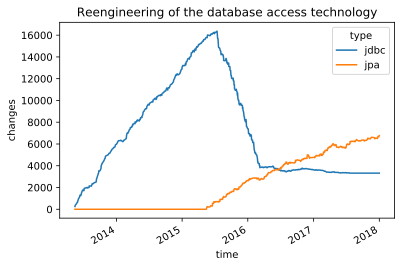

In [30]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
ax = log_progess.plot()
ax.set_title("Reengineering of the database access technology")
ax.set_xlabel("time")
ax.set_ylabel("changes");

In [45]:
progress_per_year = log_progess.groupby(log_progess.index.year).last()
progress_per_year.index.name = "year"
progress_per_year

type,jdbc,jpa
year,,
2013,5940,0
2014,12997,0
2015,7424,2655
2016,3614,4769
2017,3320,6761


In [17]:
import matplotlib.pyplot as plt
plt.savefig("reengineering.svg", format="svg")